In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# [i] reading data from file

path = 'people.txt'
df = pd.read_table(path, sep=',', header=0)
df

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5 non-null      int64  
 1   agegroup      5 non-null      object 
 2   height        5 non-null      float64
 3   status        5 non-null      object 
 4   yearsmarried  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes


In [24]:
# [ii] Ruleset definition

def E(row):
    errorlist = []

    #rule 1
    if not (0 <= row['age'] <= 150):
        errorlist.append('age should be in range 0-150')

    #rule 2
    if not(row['age'] > row['yearsmarried']):
        errorlist.append('age should be greater than years married')

    #rule 3
    if row['status'] not in ['single','married','widowed']:
        errorlist.append("status must be 'single' or 'married' or 'widowed'")

    #rule 4
    #expected_agegroup = ''
    if row['age'] < 18:
        expected_agegroup = 'child'
    elif 18 <= row['age'] < 65:
        expected_agegroup = 'adult'
    else:
        expected_agegroup = 'elderly'

    if row['agegroup'] != expected_agegroup:
        errorlist.append(f"expected age group:'{expected_agegroup}', received: '{row['agegroup']}'")

    return errorlist

In [30]:
# [iii] Applying Rulset to check for rule violations
df['ERRORS'] = df.apply(E, axis=1)
df

,age,agegroup,height,status,yearsmarried,ERRORS
0,21,adult,6.0,single,-1,[]
1,2,child,3.0,married,0,[]
2,18,adult,5.7,married,20,[age should be greater than years married]
3,221,elderly,5.0,widowed,2,[age should be in range 0-150]
4,34,child,-7.0,married,3,"[expected age group:'adult', received: 'child']"


In [33]:
# [iv] data summarization

vio = df[df['ERRORS'].apply(lambda x: len(x) > 0)]
vio

,age,agegroup,height,status,yearsmarried,ERRORS
2,18,adult,5.7,married,20,[age should be greater than years married]
3,221,elderly,5.0,widowed,2,[age should be in range 0-150]
4,34,child,-7.0,married,3,"[expected age group:'adult', received: 'child']"


ERRORS
age should be greater than years married         1
age should be in range 0-150                     1
expected age group:'adult', received: 'child'    1
Name: count, dtype: int64


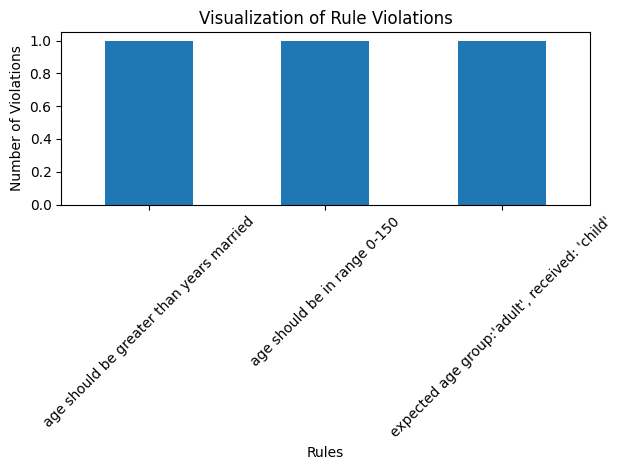

In [52]:
# [v] visualizing the summarizations

# Flatten the list of errors and count occurrences
error_counts = vio['ERRORS'].explode().value_counts()
print(error_counts)

# Plotting
error_counts.plot(kind='bar')
plt.title('Visualization of Rule Violations')
plt.xlabel('Rules')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('dirty_iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   138 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Sepal.Width'].value_counts()

Sepal.Width
 3.0     23
 3.2     12
 2.8     12
 3.1     11
 3.4     10
 2.9      9
 2.7      8
 2.5      7
 3.5      6
 3.3      6
 2.6      5
 3.8      5
 2.3      3
 2.2      3
 3.6      3
 3.7      2
 29.0     1
 4.0      1
 4.2      1
-3.0      1
 3.9      1
 4.1      1
 30.0     1
 0.0      1
Name: count, dtype: int64

In [11]:
# [i] Number and percentage of complete obeservations

df_completeobs = df.dropna()

total_obs = len(df) 
notna_obs = len(df_completeobs)
perc_notna_obs = notna_obs/total_obs*100 #BODMAS WORKS 

print('Total Observations: ', total_obs)
print('Complete Observations: ', notna_obs)
print('Percentage of Complete Observations: ', perc_notna_obs,' %', sep='')

Total Observations:  150
Complete Observations:  96
Percentage of Complete Observations: 64.0 %


In [42]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [13]:
# [ii] Replace all special values with NA

cols_to_check = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']

df[df[cols_to_check] == 'inf'] = pd.NA

ERRORS
numerical properties cannot be zero              4
sepal length must not be > 30                    2
sepal length must be longer than petal length    2
sepal length must be atleast 2x petal width      2
Name: count, dtype: int64


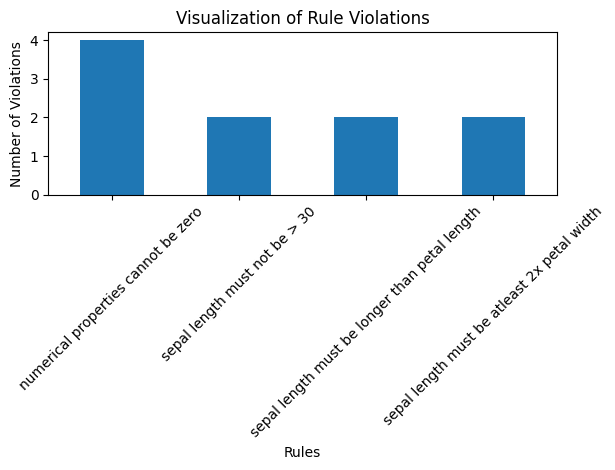

In [14]:
#Importing Ruleset
from ruleset_for_dmp2 import DirtyIrisRuleset as E

# [iv] Applying Rulset and visualizing results
df['ERRORS'] = df.apply(E, axis=1)

# data summarization 
vio = df[df['ERRORS'].apply(lambda x: len(x) > 0)]
df = df.drop(columns='ERRORS')

# Flatten the list of errors and count occurrences
error_counts = vio['ERRORS'].explode().value_counts()
print(error_counts)

# Plotting
error_counts.plot(kind='bar')
plt.title('Visualization of Rule Violations')
plt.xlabel('Rules')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


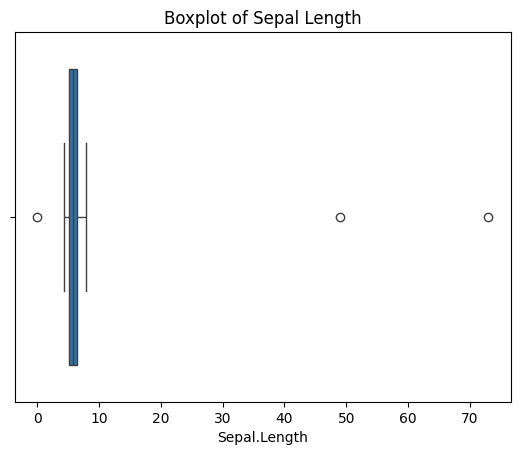

Detected Outliers:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
27           73.0         29.0          63.0          NaN  virginica
42            0.0          NaN           1.3          0.4     setosa
124          49.0         30.0          14.0          2.0     setosa


In [15]:
# [v] Outliers in sepal lenth using boxplot.stats

# plotting boxplot
plt.figure()
sns.boxplot(x=df['Sepal.Length'])
plt.title('Boxplot of Sepal Length')
plt.show()

# indentifying outliers using interquartile ranges
Q1 = df['Sepal.Length'].quantile(0.25)
Q3 = df['Sepal.Length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# detecting and printing outliers
outliers = df[(df['Sepal.Length'] < lower_bound) | (df['Sepal.Length'] > upper_bound)]
print("Detected Outliers:")
print(outliers)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [2]:
# load wine & iris dataset
iris = load_iris()
wine = load_wine()

# Convert into pandas dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [3]:
# Initialized Standard Scaler
scaler = StandardScaler()

wine_df_stdzed = scaler.fit_transform(wine_df)
iris_df_stdzed = scaler.fit_transform(iris_df)

# Convert the standardized data back to a DataFrame
wine_df = pd.DataFrame(wine_df_stdzed, columns=wine_df.columns)
iris_df = pd.DataFrame(iris_df_stdzed, columns=iris_df.columns)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Run following algorithms on 2 real datasets and use appropriate evaluation measures to compute correctness of obtained patterns:


# Q4. Run Apriori algorithm to find frequent itemsets and association rules
## 4.1 Use minimum support as 50% and minimum confidence as 75%
## 4.2 Use minimum support as 60% and minimum confidence as 60 %


In [1]:
# !pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [26]:
data1 = df[df.Country=="France"]

In [27]:
# Load the data (replace with your own dataset)
data = data1
# data = pd.read_csv('Online_Retail.csv')
# Clean the data
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

# Split data by region (e.g., France, UK, etc.)
basket = (data
                 .groupby(['InvoiceNo', 'Description'])['Quantity']
                 .sum().unstack().reset_index().fillna(0)
                 .set_index('InvoiceNo'))

# Hot encode the data
def hot_encode(x):
    return 0 if x <= 0 else 1

basket_encoded = basket.applymap(hot_encode)

# Build the model
frq_items = apriori(basket_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frq_items, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
print(rules.head())


C:\Users\shadj\AppData\Local\Temp\ipykernel_1864\2801206632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].str.strip()
C:\Users\shadj\AppData\Local\Temp\ipykernel_1864\2801206632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
C:\Users\shadj\AppData\Local\Temp\ipykernel_1864\2801206632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

                                           antecedents  \
45                        (JUMBO BAG WOODLAND ANIMALS)   
259  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
270  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
300  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
302  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   

                         consequents  antecedent support  consequent support  \
45                         (POSTAGE)            0.076531            0.765306   
259                        (POSTAGE)            0.051020            0.765306   
270                        (POSTAGE)            0.053571            0.765306   
300  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
302    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  zhangs_metric  
45   0.076531       1.000  1.306667  0.017961         inf       0.254144  
259  0.051020       

C:\Users\shadj\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [28]:
assc_rules = rules.loc[:,["antecedents","consequents","support","confidence"]]
assc_rules

,antecedents,consequents,support,confidence
45,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,1.000000
259,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.051020,1.000000
270,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.053571,1.000000
300,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.099490,0.975000
302,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.099490,0.975000
...,...,...,...,...
36,(POSTAGE),(JAM MAKING SET PRINTED),0.051020,0.066667
26,(POSTAGE),(CIRCUS PARADE CHILDRENS EGG CUP),0.051020,0.066667
97,(POSTAGE),(PARTY BUNTING),0.051020,0.066667
226,(POSTAGE),"(LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND)",0.051020,0.066667


## 4.1 Use minimum support as 50% and minimum confidence as 75%

In [29]:
#Selecting all the rules which have a minimun supprt of 50% and a minimum confidence of 75%
temp = assc_rules[assc_rules.support>0.05]
rules1 = temp[assc_rules.confidence>0.75]
rules1

,antecedents,consequents,support,confidence
45,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,1.000000
259,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.051020,1.000000
270,"(RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...",(POSTAGE),0.053571,1.000000
300,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.099490,0.975000
302,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.099490,0.975000
...,...,...,...,...
342,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)","(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.081633,0.761905
113,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.104592,0.759259
310,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...","(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",0.056122,0.758621
314,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...","(ALARM CLOCK BAKELIKE RED, POSTAGE)",0.056122,0.758621


##  4.2 Use minimum support as 60% and minimum confidence as 60 %

In [30]:
#Selecting all the rules which have a minimun supprt of 60% and a minimum confidence of 60%
temp = assc_rules[assc_rules.support>0.06]
rules2 = temp[assc_rules.confidence>0.6]
rules2

C:\Users\shadj\AppData\Local\Temp\ipykernel_1864\2960442021.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules2 = temp[assc_rules.confidence>0.6]


,antecedents,consequents,support,confidence
45,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.076531,1.000000
300,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.099490,0.975000
302,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.099490,0.975000
334,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.081633,0.969697
337,"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE, ...",(SET/6 RED SPOTTY PAPER CUPS),0.081633,0.969697
...,...,...,...,...
285,(SET/6 RED SPOTTY PAPER CUPS),"(SET/20 RED RETROSPOT PAPER NAPKINS, POSTAGE)",0.084184,0.611111
265,"(PLASTERS IN TIN WOODLAND ANIMALS, POSTAGE)",(PLASTERS IN TIN SPACEBOY),0.084184,0.611111
268,(PLASTERS IN TIN SPACEBOY),"(PLASTERS IN TIN WOODLAND ANIMALS, POSTAGE)",0.084184,0.611111
254,"(PLASTERS IN TIN WOODLAND ANIMALS, POSTAGE)",(PLASTERS IN TIN CIRCUS PARADE),0.084184,0.611111


In [32]:
data2 = df[df.Country=="Spain"]

In [33]:
# Load the data (replace with your own dataset)
data = data2
# data = pd.read_csv('Online_Retail.csv')
# Clean the data
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

# Split data by region (e.g., France, UK, etc.)
basket = (data
                 .groupby(['InvoiceNo', 'Description'])['Quantity']
                 .sum().unstack().reset_index().fillna(0)
                 .set_index('InvoiceNo'))

# Hot encode the data
def hot_encode(x):
    return 0 if x <= 0 else 1

basket_encoded = basket.applymap(hot_encode)

# Build the model
frq_items = apriori(basket_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frq_items, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
print(rules.head())


                                           antecedents  \
240     (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)   
245                          (LUNCH BAG  BLACK SKULL.)   
64                    (PINK REGENCY TEACUP AND SAUCER)   
85                           (LUNCH BAG  BLACK SKULL.)   
235  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   

                                        consequents  antecedent support  \
240                       (LUNCH BAG  BLACK SKULL.)            0.055556   
245  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)            0.055556   
64                (GREEN REGENCY TEACUP AND SAUCER)            0.055556   
85                            (LUNCH BAG CARS BLUE)            0.055556   
235               (GREEN REGENCY TEACUP AND SAUCER)            0.055556   

     consequent support   support  confidence  lift  leverage  conviction  \
240            0.055556  0.055556         1.0  18.0  0.052469         inf   
245            0.055556  0.055556         1.0 

C:\Users\shadj\AppData\Local\Temp\ipykernel_1864\2060633128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].str.strip()
C:\Users\shadj\AppData\Local\Temp\ipykernel_1864\2060633128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
C:\Users\shadj\AppData\Local\Temp\ipykernel_1864\2060633128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [35]:
assc_rules = rules.loc[:,["antecedents","consequents","support","confidence"]]
assc_rules

,antecedents,consequents,support,confidence
240,"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)",(LUNCH BAG BLACK SKULL.),0.055556,1.000000
245,(LUNCH BAG BLACK SKULL.),"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)",0.055556,1.000000
64,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.055556,1.000000
85,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.055556,1.000000
235,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.055556,1.000000
...,...,...,...,...
141,(POSTAGE),(TEA TIME KITCHEN APRON),0.055556,0.080645
143,(POSTAGE),(WORLD WAR 2 GLIDERS ASSTD DESIGNS),0.055556,0.080645
214,(POSTAGE),"(ASSORTED COLOUR BIRD ORNAMENT, PLASTERS IN TI...",0.055556,0.080645
263,(POSTAGE),"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...",0.055556,0.080645


## 4.1 Use minimum support as 50% and minimum confidence as 75%

In [39]:
#Selecting all the rules which have a minimun supprt of 50% and a minimum confidence of 75%
temp = assc_rules[assc_rules.support>0.05]
rules2 = temp[assc_rules.confidence>0.75]
rules2

,antecedents,consequents,support,confidence
240,"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)",(LUNCH BAG BLACK SKULL.),0.055556,1.000000
245,(LUNCH BAG BLACK SKULL.),"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)",0.055556,1.000000
64,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.055556,1.000000
85,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.055556,1.000000
235,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.055556,1.000000
...,...,...,...,...
258,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...",(POSTAGE),0.055556,0.833333
169,"(ASSORTED COLOUR BIRD ORNAMENT, POSTAGE)",(6 RIBBONS RUSTIC CHARM),0.100000,0.818182
110,(PLASTERS IN TIN SKULLS),(POSTAGE),0.088889,0.800000
132,(SET OF 72 RETROSPOT PAPER DOILIES),(POSTAGE),0.088889,0.800000


##  4.2 Use minimum support as 60% and minimum confidence as 60 %

In [40]:
temp = assc_rules[assc_rules.support>0.05]
rules4 = temp[assc_rules.confidence>0.60]
rules4

,antecedents,consequents,support,confidence
240,"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)",(LUNCH BAG BLACK SKULL.),0.055556,1.000
245,(LUNCH BAG BLACK SKULL.),"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)",0.055556,1.000
64,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.055556,1.000
85,(LUNCH BAG BLACK SKULL.),(LUNCH BAG CARS BLUE),0.055556,1.000
235,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.055556,1.000
...,...,...,...,...
13,(PLASTERS IN TIN WOODLAND ANIMALS),(6 RIBBONS RUSTIC CHARM),0.055556,0.625
17,(RED RETROSPOT CAKE STAND),(6 RIBBONS RUSTIC CHARM),0.055556,0.625
146,(RED RETROSPOT CAKE STAND),(REGENCY CAKESTAND 3 TIER),0.055556,0.625
172,(6 RIBBONS RUSTIC CHARM),"(ASSORTED COLOUR BIRD ORNAMENT, POSTAGE)",0.100000,0.600


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [2]:
df1 = pd.read_csv('diabetes.csv')
df2 = pd.read_csv('Thyroid_Diff.csv')

Pre-Processing Dataframe 1

In [3]:
df1.info() #already preprocessed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pre-Processing Dataframe 2

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
list_for_onehot = ['Thyroid Function','Physical Examination','Adenopathy','Pathology',
                   'Pathology','Risk','T','N','Stage','Response']

In [6]:
# binary categorical --> to --> binary numerical

df2['Gender'] = (df2['Gender']=='M').astype(int)
df2['Smoking'] = (df2['Smoking']=='Yes').astype(int)
df2['Hx Smoking'] = (df2['Hx Smoking']=='Yes').astype(int)
df2['Hx Radiothreapy'] = (df2['Hx Radiothreapy']=='Yes').astype(int)
df2['Focality'] = (df2['Focality']=='Uni-Focal').astype(int)
df2['M'] = (df2['M']=='M1').astype(int)
df2['Recurred'] = (df2['Recurred']=='Yes').astype(int)

In [7]:
df2 = pd.get_dummies(df2, columns = list_for_onehot)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               383 non-null    int64
 1   Gender                                            383 non-null    int32
 2   Smoking                                           383 non-null    int32
 3   Hx Smoking                                        383 non-null    int32
 4   Hx Radiothreapy                                   383 non-null    int32
 5   Focality                                          383 non-null    int32
 6   M                                                 383 non-null    int32
 7   Recurred                                          383 non-null    int32
 8   Thyroid Function_Clinical Hyperthyroidism         383 non-null    bool 
 9   Thyroid Function_Clinical Hypothyroidism   

In [8]:
tf_map = {False:0, True:1}

cols_to_encode = [x for x in range(8,54)]

for col_idx in cols_to_encode:
    df2.iloc[:, col_idx] = df2.iloc[:, col_idx].map(tf_map)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               383 non-null    int64
 1   Gender                                            383 non-null    int32
 2   Smoking                                           383 non-null    int32
 3   Hx Smoking                                        383 non-null    int32
 4   Hx Radiothreapy                                   383 non-null    int32
 5   Focality                                          383 non-null    int32
 6   M                                                 383 non-null    int32
 7   Recurred                                          383 non-null    int32
 8   Thyroid Function_Clinical Hyperthyroidism         383 non-null    int64
 9   Thyroid Function_Clinical Hypothyroidism   

TrainTestSplit 

In [9]:
X1 = df1.loc[:,df1.columns!='Outcome']
y1 = df1.loc[:,'Outcome']

X2 = df2.loc[:,df2.columns!='Recurred']
y2 = df2.loc[:,'Recurred']

# a) 75%-25%
X1_train_A, X1_test_A, y1_train_A, y1_test_A = train_test_split(X1, y1, test_size=0.25, random_state=42)
X2_train_A, X2_test_A, y2_train_A, y2_test_A = train_test_split(X2, y2, test_size=0.25, random_state=42)

# b) 66.6%-33.3%
X1_train_B, X1_test_B, y1_train_B, y1_test_B = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train_B, X2_test_B, y2_train_B, y2_test_B = train_test_split(X2, y2, test_size=0.33, random_state=42)


5.1 Evaluation on Train-Test Split as 75-25 and 66.6-33.3

In [10]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}


print('For DF1: 75% Train - 25% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X1_train_A, y1_train_A)

    # Evaluate the classifier
    y_pred = clf.predict(X1_test_A)
    accuracy = accuracy_score(y1_test_A, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")


print('\nFor DF1: 66.6% Train - 33.3% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X1_train_B, y1_train_B)
    
    # Evaluate the classifier
    y_pred = clf.predict(X1_test_B)
    accuracy = accuracy_score(y1_test_B, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")

print('\nFor DF2: 75% Train - 25% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X2_train_A, y2_train_A)

    # Evaluate the classifier
    y_pred = clf.predict(X2_test_A)
    accuracy = accuracy_score(y2_test_A, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")

print('\nFor DF2: 66.6% Train - 33.3% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X2_train_B, y2_train_B)

    # Evaluate the classifier
    y_pred = clf.predict(X2_test_B)
    accuracy = accuracy_score(y2_test_B, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")

For DF1: 75% Train - 25% Test
   KNN Accuracy: 0.66
   Naive Bayes Accuracy: 0.73
   Decision Tree Accuracy: 0.69

For DF1: 66.6% Train - 33.3% Test
   KNN Accuracy: 0.70
   Naive Bayes Accuracy: 0.74
   Decision Tree Accuracy: 0.71

For DF2: 75% Train - 25% Test
   KNN Accuracy: 0.89
   Naive Bayes Accuracy: 0.96
   Decision Tree Accuracy: 0.95

For DF2: 66.6% Train - 33.3% Test
   KNN Accuracy: 0.86
   Naive Bayes Accuracy: 0.94
   Decision Tree Accuracy: 0.96


5.2 Evaluation using Holdout, Random Subsampling and 5-Fold CV

In [73]:
# a) holdout (70%-30%)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=42)

print('Holdout Method for DF1: 70% Train - 30% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X1_train, y1_train)

    # Evaluate the classifier
    y_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")

print('\nHoldout Method for DF2: 70% Train - 30% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X2_train, y2_train)

    # Evaluate the classifier
    y_pred = clf.predict(X2_test)
    accuracy = accuracy_score(y2_test, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")


Holdout Method for DF1: 70% Train - 30% Test
   KNN Accuracy: 0.71
   Naive Bayes Accuracy: 0.74
   Decision Tree Accuracy: 0.76

Holdout Method for DF2: 70% Train - 30% Test
   KNN Accuracy: 0.94
   Naive Bayes Accuracy: 0.93
   Decision Tree Accuracy: 0.91


In [11]:
# b) random subsample 

X1_train_1, X1_test_1, y1_train_1, y1_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42) # 80-20
X1_train_2, X1_test_2, y1_train_2, y1_test_2 = train_test_split(X1, y1, test_size=0.33, random_state=42) # 66.6-33.3
X1_train_3, X1_test_3, y1_train_3, y1_test_3 = train_test_split(X1, y1, test_size=0.3, random_state=42) # 70-30

X2_train_1, X2_test_1, y2_train_1, y2_test_1 = train_test_split(X2, y2, test_size=0.2, random_state=42) # 80-20
X2_train_2, X2_test_2, y2_train_2, y2_test_2 = train_test_split(X2, y2, test_size=0.33, random_state=42) # 66.6-33.3
X2_train_3, X2_test_3, y2_train_3, y2_test_3 = train_test_split(X2, y2, test_size=0.3, random_state=42) # 70-30



print('Random Subsample for DF1:')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X1_train_1, y1_train_1)
    y_pred_1 = clf.predict(X1_test_1)
    acc_1 = accuracy_score(y1_test_1, y_pred_1)

    clf.fit(X1_train_2, y1_train_2)
    y_pred_2 = clf.predict(X1_test_2)
    acc_2 = accuracy_score(y1_test_2, y_pred_2)

    clf.fit(X1_train_3, y1_train_3)
    y_pred_3 = clf.predict(X1_test_3)
    acc_3 = accuracy_score(y1_test_3, y_pred_3)
    
    accuracy = (acc_1 + acc_2 + acc_3)/3
    
    print('  ',f"{name} Accuracy: {accuracy:.2f}")

print('\nRandom Subsample for DF2:')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X2_train_1, y2_train_1)
    y_pred_1 = clf.predict(X2_test_1)
    acc_1 = accuracy_score(y2_test_1, y_pred_1)

    clf.fit(X2_train_2, y2_train_2)
    y_pred_2 = clf.predict(X2_test_2)
    acc_2 = accuracy_score(y2_test_2, y_pred_2)

    clf.fit(X2_train_3, y2_train_3)
    y_pred_3 = clf.predict(X2_test_3)
    acc_3 = accuracy_score(y2_test_3, y_pred_3)

    accuracy = (acc_1 + acc_2 + acc_3)/3
    
    print('  ',f"{name} Accuracy: {accuracy:.2f}")


Random Subsample for DF1:
   KNN Accuracy: 0.68
   Naive Bayes Accuracy: 0.75
   Decision Tree Accuracy: 0.73

Random Subsample for DF2:
   KNN Accuracy: 0.87
   Naive Bayes Accuracy: 0.95
   Decision Tree Accuracy: 0.97


In [71]:
# c) 5-Fold Cross-Validation 

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scoring = ['accuracy']

models = [KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier()]

print('5-Fold CV for DF1:')
for model in models:
    result = list()
    scores = cross_validate(model, X1, y1, cv=kf, scoring=scoring)
    
    for value in scores:
        v = str(value)
        mean_score = scores[v].mean()
        std_score = scores[v].std()
        if (v == "fit_time" or v =="score_time"):
          pass
        else:
          print(f"{model} --> {mean_score:.2f} ± {std_score:.2f}")

print('\n5-Fold CV for DF2:')
for model in models:
    result = list()
    scores = cross_validate(model, X2, y2, cv=kf, scoring=scoring)
    
    for value in scores:
        v = str(value)
        mean_score = scores[v].mean()
        std_score = scores[v].std()
        if (v == "fit_time" or v =="score_time"):
          pass
        else:
          print(f"{model} --> {mean_score:.2f} ± {std_score:.2f}")

5-Fold CV for DF1:
KNeighborsClassifier() --> 0.69 ± 0.02
GaussianNB() --> 0.75 ± 0.02
DecisionTreeClassifier() --> 0.72 ± 0.02

5-Fold CV for DF2:
KNeighborsClassifier() --> 0.88 ± 0.03
GaussianNB() --> 0.95 ± 0.01
DecisionTreeClassifier() --> 0.93 ± 0.03


5.3 Results After Scaling the Values

In [75]:
scaler = StandardScaler()

X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)

print('After Scaling values for DF1: 80% Train - 20% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X1_train, y1_train)

    # Evaluate the classifier
    y_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y1_test, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")

print('\nAfter Scaling values for DF2: 80% Train - 20% Test')
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X2_train, y2_train)

    # Evaluate the classifier
    y_pred = clf.predict(X2_test)
    accuracy = accuracy_score(y2_test, y_pred)
    print('  ',f"{name} Accuracy: {accuracy:.2f}")


After Scaling values for DF1: 80% Train - 20% Test
   KNN Accuracy: 0.71
   Naive Bayes Accuracy: 0.71
   Decision Tree Accuracy: 0.75

After Scaling values for DF2: 80% Train - 20% Test
   KNN Accuracy: 0.95
   Naive Bayes Accuracy: 0.94
   Decision Tree Accuracy: 0.94
